In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('/kaggle/input/boston-housing-dataset/HousingData.csv')

In [24]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


**analysis**

In [25]:
for col in df.columns:
    print(col + '\n------')
    print(df[col].value_counts())
    print('---------------------')

CRIM
------
14.33370    2
0.01501     2
0.00632     1
0.05023     1
0.02543     1
           ..
1.34284     1
1.22358     1
2.44668     1
3.53501     1
0.04741     1
Name: CRIM, Length: 484, dtype: int64
---------------------
ZN
------
0.0      360
20.0      20
80.0      14
22.0      10
12.5      10
25.0      10
45.0       6
40.0       6
30.0       5
90.0       5
95.0       4
60.0       4
33.0       4
21.0       4
55.0       3
70.0       3
75.0       3
52.5       3
35.0       2
82.5       2
28.0       2
85.0       2
17.5       1
100.0      1
34.0       1
18.0       1
Name: ZN, dtype: int64
---------------------
INDUS
------
18.10    127
19.58     28
8.14      22
6.20      18
21.89     14
        ... 
1.32       1
1.38       1
3.75       1
0.46       1
2.31       1
Name: INDUS, Length: 76, dtype: int64
---------------------
CHAS
------
0.0    452
1.0     34
Name: CHAS, dtype: int64
---------------------
NOX
------
0.538    23
0.713    18
0.437    17
0.871    16
0.624    15
         ..
0

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [27]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [28]:
df['CRIM'].fillna(df['CRIM'].median(), inplace=True)
df['ZN'].fillna(df['ZN'].median(), inplace=True)
df['INDUS'].fillna(df['INDUS'].median(), inplace=True)
df['CHAS'].fillna(df['CHAS'].median(), inplace=True)
df['AGE'].fillna(df['AGE'].median(), inplace=True)
df['LSTAT'].fillna(df['LSTAT'].median(), inplace=True)

In [29]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [30]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.479140,10.768775,11.028893,0.067194,0.554695,6.284634,68.845850,3.795043,9.549407,408.237154,18.455534,356.674032,12.664625,22.532806
std,8.570832,23.025124,6.704679,0.250605,0.115878,0.702617,27.486962,2.105710,8.707259,168.537116,2.164946,91.294864,7.017219,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,2.808720,0.000000,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


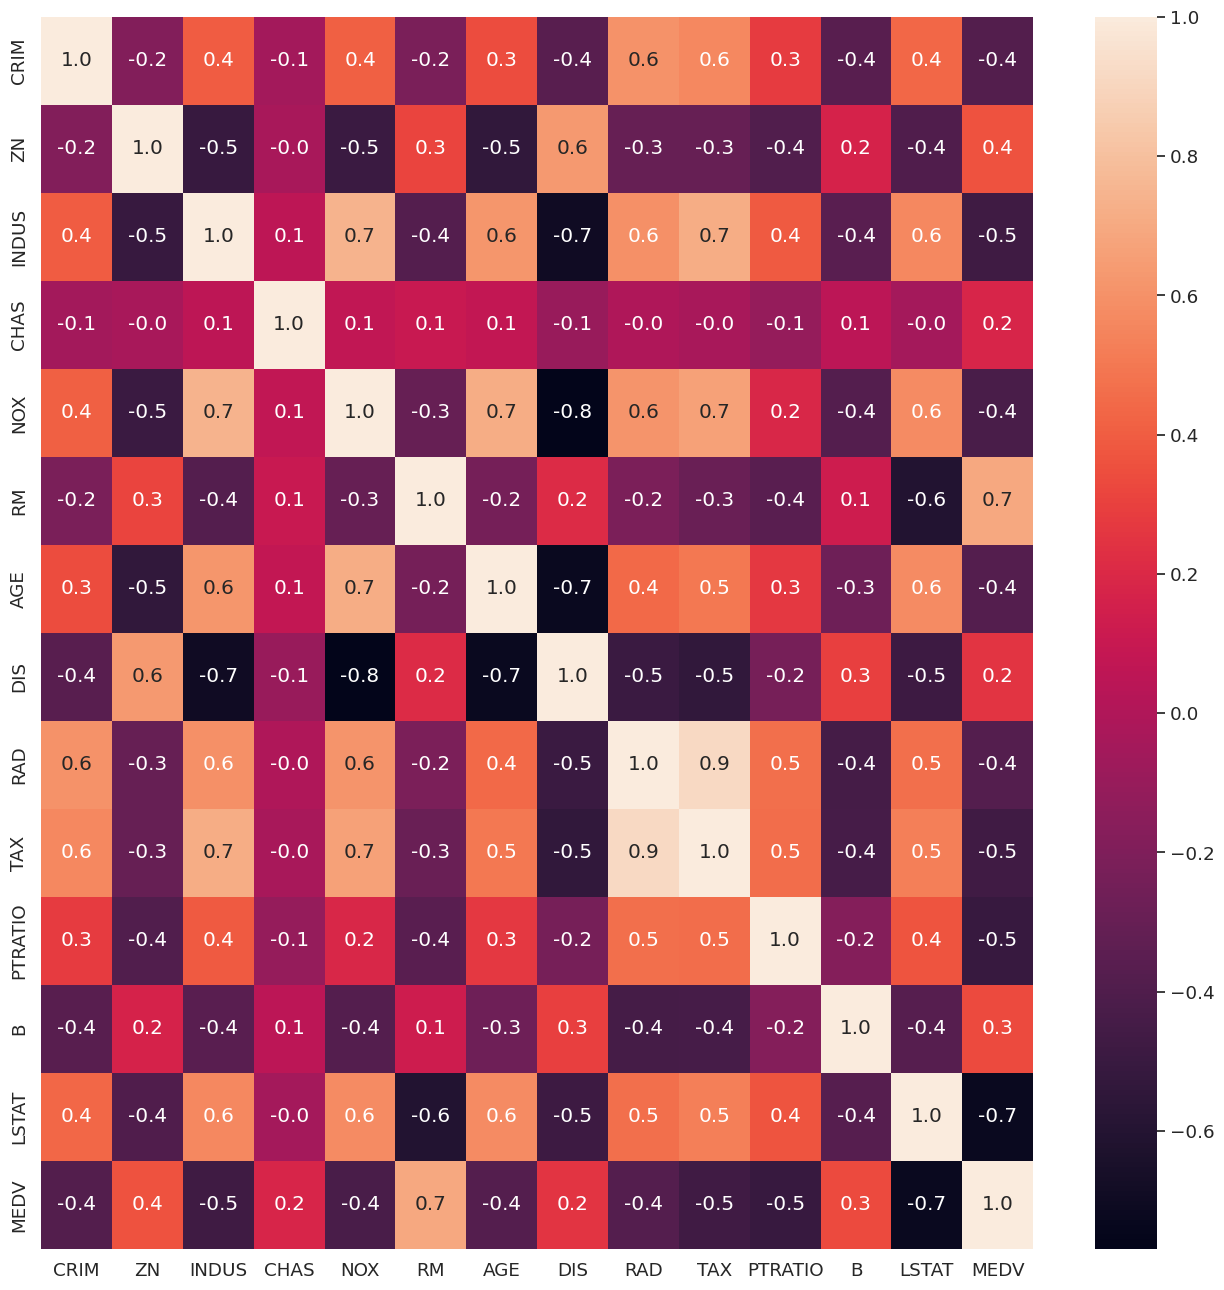

In [31]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, fmt=".1f");

<AxesSubplot: >

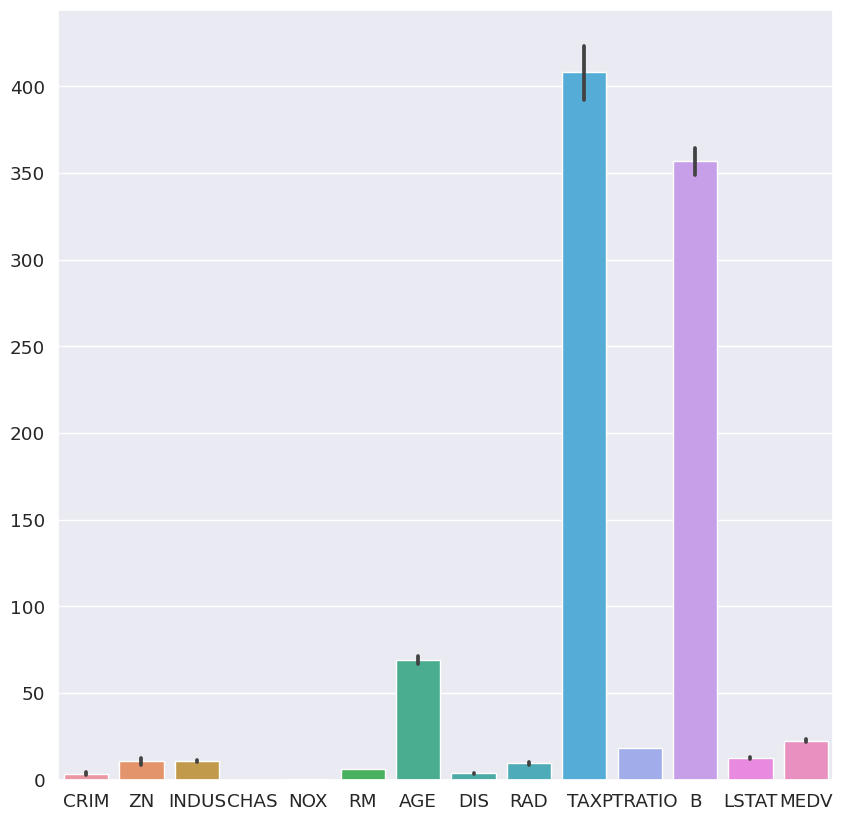

In [32]:
sns.barplot(df)

**normalization**

In [33]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [34]:
from sklearn.preprocessing import StandardScaler
stand= StandardScaler()

In [35]:
for column in ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']:
    df[column] = stand.fit_transform(df[column].values.reshape(-1,1))

In [37]:
X = df.drop('MEDV', axis = 1)
y = df['MEDV']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
def model(model, x_train, y_train, x_test, y_test):
    mod = model
    mod_fit = mod.fit(x_train, y_train)
    y_pred = mod_fit.predict(x_test)
    print("accuracy : ")
    print(mod.score(x_train, y_train))
    print('Model results')
    print('MAE:', mean_absolute_error(y_pred, y_test).round(2))
    print('MSE:', mean_squared_error(y_pred, y_test).round(2))
    print('RMSE:', np.sqrt(mean_absolute_error(y_pred, y_test)).round(2))
    print('R2_score:', r2_score(y_pred, y_test).round(2))
    print('-'*20)
    
    df_model = pd.DataFrame({
    'Test': y_test,
    'Predict': y_pred
    })
    print(df_model.head(10))
    
    plt.figure(figsize = (14, 8))
    sns.regplot(x = y_test, y = y_pred)


accuracy : 
0.742578124156171
Model results
MAE: 3.15
MSE: 25.0
RMSE: 1.77
R2_score: 0.63
--------------------
     Test    Predict
173  23.6  29.022908
274  32.4  36.516545
491  13.6  14.539302
72   22.8  25.060058
452  16.1  18.396727
76   20.0  23.028883
316  17.8  17.967158
140  14.0  14.582830
471  19.6  22.082804
500  16.8  20.856181


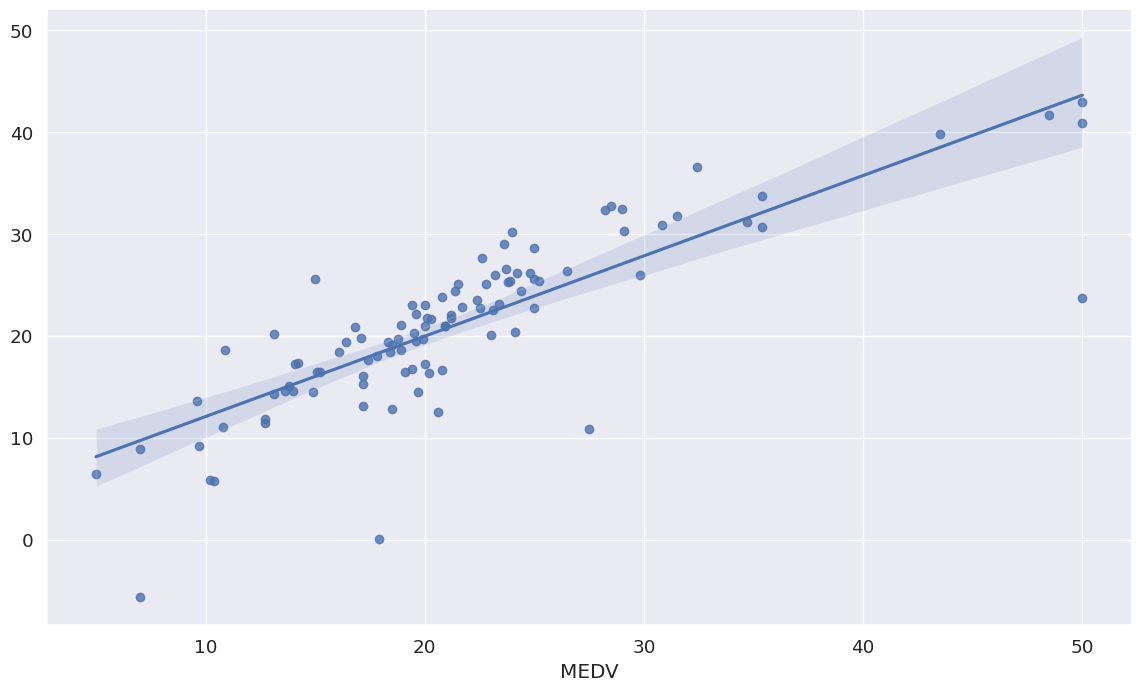

In [48]:
model(LinearRegression(), X_train, y_train, X_test, y_test)

accuracy : 
0.9762949333337388
Model results
MAE: 1.94
MSE: 7.47
RMSE: 1.39
R2_score: 0.88
--------------------
     Test    Predict
173  23.6  23.228241
274  32.4  31.332393
491  13.6  16.749068
72   22.8  23.672376
452  16.1  17.571914
76   20.0  22.424042
316  17.8  18.264213
140  14.0  14.703346
471  19.6  20.201717
500  16.8  20.653581


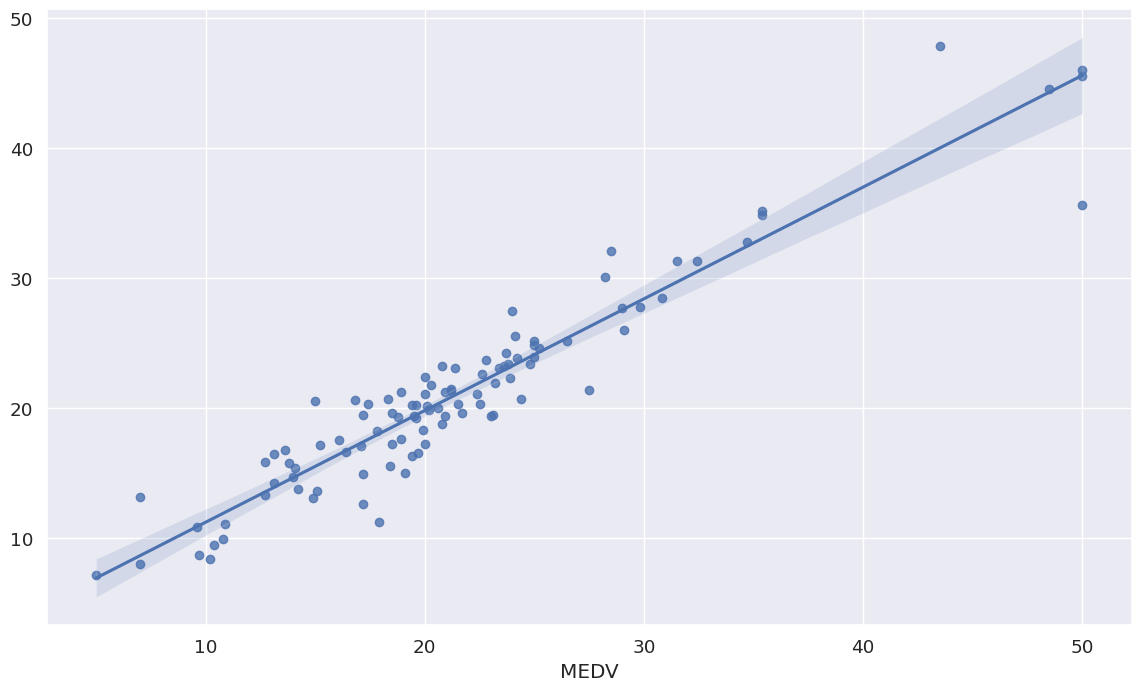

In [49]:
model(GradientBoostingRegressor(), X_train, y_train, X_test, y_test)

accuracy : 
0.742578124156171
Model results
MAE: 3.15
MSE: 25.0
RMSE: 1.77
R2_score: 0.63
--------------------
     Test    Predict
173  23.6  29.022908
274  32.4  36.516545
491  13.6  14.539302
72   22.8  25.060058
452  16.1  18.396727
76   20.0  23.028883
316  17.8  17.967158
140  14.0  14.582830
471  19.6  22.082804
500  16.8  20.856181


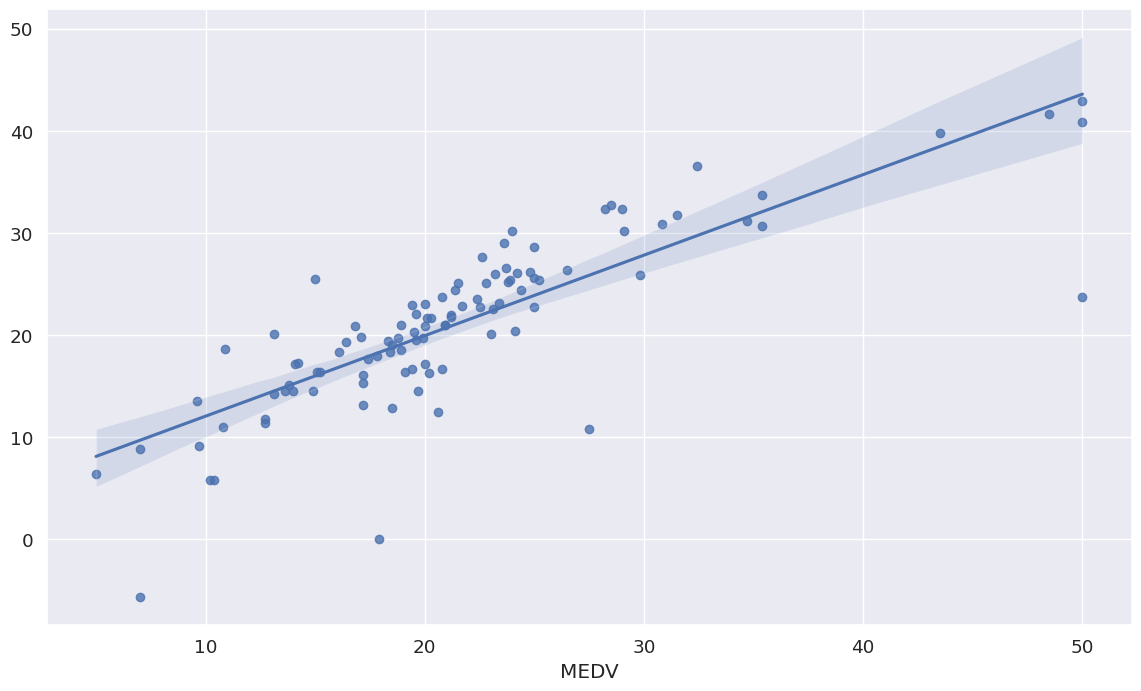

In [50]:
model(LassoCV(alphas = np.arange(0, 1, 0.01), cv = RepeatedKFold(n_splits= 10 , n_repeats= 3 , random_state= 1), n_jobs = -1), X_train, y_train, X_test, y_test)

**the best algorathim wiht this data is GradientBoostingRegressor **